## Import

In [28]:
import random
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings(action='ignore') 

## Fixed Random-Seed

In [3]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42) # Seed 고정

## Load Data

In [67]:
train = pd.read_csv('./open/train.csv')
test = pd.read_csv('./open/test.csv')

In [69]:
train['timestamp'] = pd.to_datetime(train['timestamp'])
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59397 entries, 0 to 59396
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ID           59397 non-null  object        
 1   timestamp    59397 non-null  datetime64[ns]
 2   item         59397 non-null  object        
 3   corporation  59397 non-null  object        
 4   location     59397 non-null  object        
 5   supply(kg)   59397 non-null  float64       
 6   price(원/kg)  59397 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 3.2+ MB


In [66]:
test.info()
test

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           1092 non-null   object
 1   timestamp    1092 non-null   object
 2   item         1092 non-null   object
 3   corporation  1092 non-null   object
 4   location     1092 non-null   object
dtypes: object(5)
memory usage: 42.8+ KB


,ID,timestamp,item,corporation,location
0,TG_A_J_20230304,2023-03-04,TG,A,J
1,TG_A_J_20230305,2023-03-05,TG,A,J
2,TG_A_J_20230306,2023-03-06,TG,A,J
3,TG_A_J_20230307,2023-03-07,TG,A,J
4,TG_A_J_20230308,2023-03-08,TG,A,J
...,...,...,...,...,...
1087,RD_F_J_20230327,2023-03-27,RD,F,J
1088,RD_F_J_20230328,2023-03-28,RD,F,J
1089,RD_F_J_20230329,2023-03-29,RD,F,J
1090,RD_F_J_20230330,2023-03-30,RD,F,J


In [71]:
print(train.item.unique())
print(train.corporation.unique())
print(train.location.unique())

['TG' 'CR' 'CB' 'RD' 'BC']
['A' 'B' 'C' 'D' 'E' 'F']
['J' 'S']


In [97]:
train[train['corporation'] == 'F']

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg)
56351,CB_F_J_20190101,2019-01-01,CB,F,J,0.0,0.0
56352,CB_F_J_20190102,2019-01-02,CB,F,J,0.0,0.0
56353,CB_F_J_20190103,2019-01-03,CB,F,J,67320.0,478.0
56354,CB_F_J_20190104,2019-01-04,CB,F,J,23584.0,600.0
56355,CB_F_J_20190105,2019-01-05,CB,F,J,48928.0,536.0
...,...,...,...,...,...,...,...
59392,RD_F_J_20230227,2023-02-27,RD,F,J,452440.0,468.0
59393,RD_F_J_20230228,2023-02-28,RD,F,J,421980.0,531.0
59394,RD_F_J_20230301,2023-03-01,RD,F,J,382980.0,574.0
59395,RD_F_J_20230302,2023-03-02,RD,F,J,477220.0,523.0


In [99]:
test

,ID,timestamp,item,corporation,location
0,TG_A_J_20230304,2023-03-04,TG,A,J
1,TG_A_J_20230305,2023-03-05,TG,A,J
2,TG_A_J_20230306,2023-03-06,TG,A,J
3,TG_A_J_20230307,2023-03-07,TG,A,J
4,TG_A_J_20230308,2023-03-08,TG,A,J
...,...,...,...,...,...
1087,RD_F_J_20230327,2023-03-27,RD,F,J
1088,RD_F_J_20230328,2023-03-28,RD,F,J
1089,RD_F_J_20230329,2023-03-29,RD,F,J
1090,RD_F_J_20230330,2023-03-30,RD,F,J


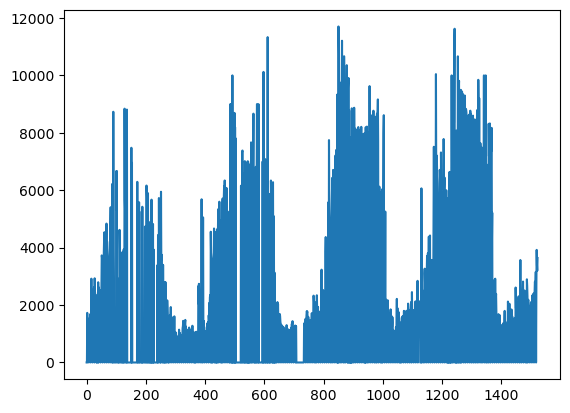

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg)
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0
...,...,...,...,...,...,...,...
1518,TG_A_J_20230227,2023-02-27,TG,A,J,7009.6,2657.0
1519,TG_A_J_20230228,2023-02-28,TG,A,J,6775.0,3922.0
1520,TG_A_J_20230301,2023-03-01,TG,A,J,7696.7,3397.0
1521,TG_A_J_20230302,2023-03-02,TG,A,J,5815.0,3195.0


In [109]:
data = train[(train['location']=='J') & (train['corporation'] == 'A') & (train['item'] == 'TG')].reset_index(drop=True)
plt.plot(data['price(원/kg)'])
plt.show()
data

In [105]:
train.groupby('item').count()
train.groupby('location').count()
train.groupby(['location','corporation','item']).count()

ID  timestamp  supply(kg)  price(원/kg)
location corporation item                                          
J        A           BC    1523       1523        1523         1523
                     CB    1523       1523        1523         1523
                     CR    1523       1523        1523         1523
                     RD    1523       1523        1523         1523
                     TG    1523       1523        1523         1523
         B           BC    1523       1523        1523         1523
                     CR    1523       1523        1523         1523
                     TG    1523       1523        1523         1523
         C           BC    1523       1523        1523         1523
                     CR    1523       1523        1523         1523
                     TG    1523       1523        1523         1523
         D           BC    1523       1523        1523         1523
                     CB    1523       1523        1523         1523
                     CR    1523       1523        1523         1523
                     RD    1523       1523        1523         1523
                     TG    1523       1523        1523         1523
         E           BC    1523       1523        1523         1523
                     CB    1523       1523        1523         1523
                     CR    1523       1523        1523         1523
                     RD    1523       1523        1523         1523
                     TG    1523       1523        1523         1523
         F           CB    1523       1523        1523         1523
                     RD    1523       1523        1523         1523
S        A           BC    1523       1523        1523         1523
                     CB    1523       1523        1523         1523
                     RD    1523       1523        1523         1523
                     TG    1523       1523        1523         1523
         B           BC    1523       1523        1523         1523
                     TG    1523       1523        1523         1523
         C           BC    1523       1523        1523         1523
                     RD    1523       1523        1523         1523
                     TG    1523       1523        1523         1523
         D           CR    1523       1523        1523         1523
                     RD    1523       1523        1523         1523
                     TG    1523       1523        1523         1523
         E           BC    1523       1523        1523         1523
                     CR    1523       1523        1523         1523
                     RD    1523       1523        1523         1523
                     TG    1523       1523        1523         1523

In [73]:
test.groupby(['location','corporation','item']).count()

ID  timestamp
location corporation item               
J        A           BC    28         28
                     CB    28         28
                     CR    28         28
                     RD    28         28
                     TG    28         28
         B           BC    28         28
                     CR    28         28
                     TG    28         28
         C           BC    28         28
                     CR    28         28
                     TG    28         28
         D           BC    28         28
                     CB    28         28
                     CR    28         28
                     RD    28         28
                     TG    28         28
         E           BC    28         28
                     CB    28         28
                     CR    28         28
                     RD    28         28
                     TG    28         28
         F           CB    28         28
                     RD    28         28
S        A           BC    28         28
                     CB    28         28
                     RD    28         28
                     TG    28         28
         B           BC    28         28
                     TG    28         28
         C           BC    28         28
                     RD    28         28
                     TG    28         28
         D           CR    28         28
                     RD    28         28
                     TG    28         28
         E           BC    28         28
                     CR    28         28
                     RD    28         28
                     TG    28         28

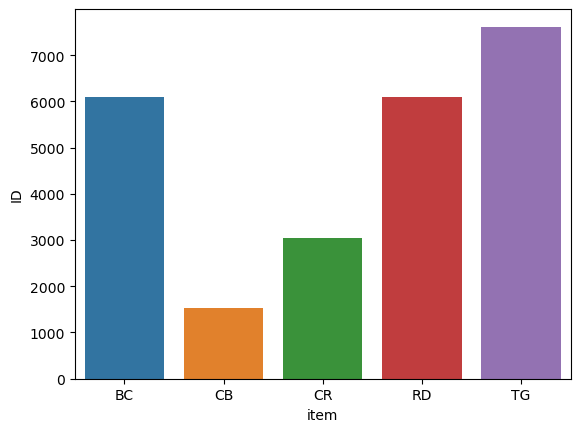

<Axes: xlabel='item', ylabel='ID'>

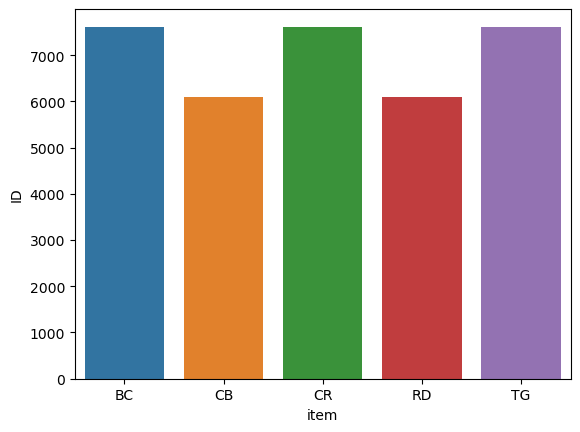

In [65]:
tp = train.groupby(['location','item']).count().reset_index()
sns.barplot(data=tp[tp['location'] == 'S'].loc[:,['item','ID']],x='item',y='ID')
plt.show()
sns.barplot(data=tp[tp['location'] == 'J'].loc[:,['item','ID']],x='item',y='ID')

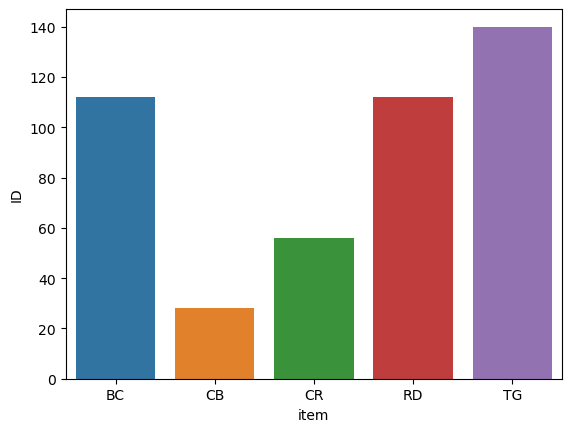

<Axes: xlabel='item', ylabel='ID'>

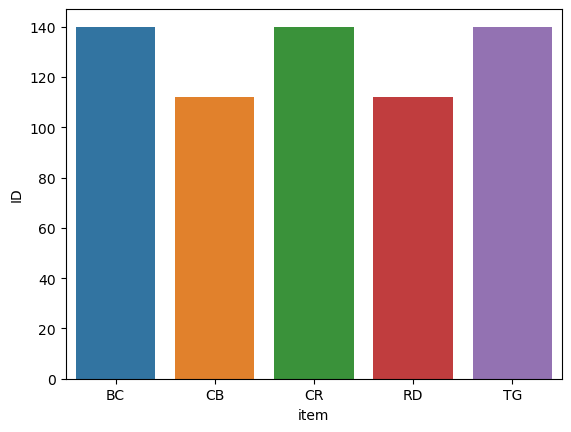

In [64]:
tp = test.groupby(['location','item']).count().reset_index()
sns.barplot(data=tp[tp['location'] == 'S'].loc[:,['item','ID']],x='item',y='ID')
plt.show()
sns.barplot(data=tp[tp['location'] == 'J'].loc[:,['item','ID']],x='item',y='ID')

## Data Pre-Processing

In [10]:
#시계열 특성을 학습에 반영하기 위해 timestamp를 월, 일, 시간으로 나눕니다
train['year'] = train['timestamp'].apply(lambda x : int(x[0:4]))
train['month'] = train['timestamp'].apply(lambda x : int(x[5:7]))
train['day'] = train['timestamp'].apply(lambda x : int(x[8:10]))

test['year'] = test['timestamp'].apply(lambda x : int(x[0:4]))
test['month'] = test['timestamp'].apply(lambda x : int(x[5:7]))
test['day'] = test['timestamp'].apply(lambda x : int(x[8:10]))

In [11]:
#학습에 사용하지 않을 변수들을 제거합니다
train_x = train.drop(columns=['ID', 'timestamp', 'supply(kg)', 'price(원/kg)'])
train_y = train['price(원/kg)']

test_x = test.drop(columns=['ID', 'timestamp'])

In [12]:
#질적 변수들을 수치화합니다
qual_col = ['item', 'corporation', 'location']

for i in qual_col:
    le = LabelEncoder()
    train_x[i]=le.fit_transform(train_x[i])
    test_x[i]=le.transform(test_x[i]) #test 데이터에 대해서 fit하는 것은 data leakage에 해당합니다

print('Done.')

Done.


## Regression Model Fit

In [7]:
model = RandomForestRegressor()
model.fit(train_x, train_y)

RandomForestRegressor()

## Inference

In [8]:
preds = model.predict(test_x)

## Submission

In [9]:
submission = pd.read_csv('./sample_submission.csv')
submission

,ID,answer
0,TG_A_J_20230304,0
1,TG_A_J_20230305,0
2,TG_A_J_20230306,0
3,TG_A_J_20230307,0
4,TG_A_J_20230308,0
...,...,...
1087,RD_F_J_20230327,0
1088,RD_F_J_20230328,0
1089,RD_F_J_20230329,0
1090,RD_F_J_20230330,0


In [10]:
submission['answer'] = preds
submission

,ID,answer
0,TG_A_J_20230304,3636.64
1,TG_A_J_20230305,4109.28
2,TG_A_J_20230306,401.82
3,TG_A_J_20230307,3277.93
4,TG_A_J_20230308,3067.03
...,...,...
1087,RD_F_J_20230327,271.27
1088,RD_F_J_20230328,441.28
1089,RD_F_J_20230329,439.31
1090,RD_F_J_20230330,436.00


In [11]:
submission.to_csv('./baseline_submission.csv', index=False)